In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pyfonts import load_google_font

In [2]:
# Load shape file
gdf = gpd.read_file("shape files/cb_2018_us_state_5m.shp")

In [3]:
# Check CRS info
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

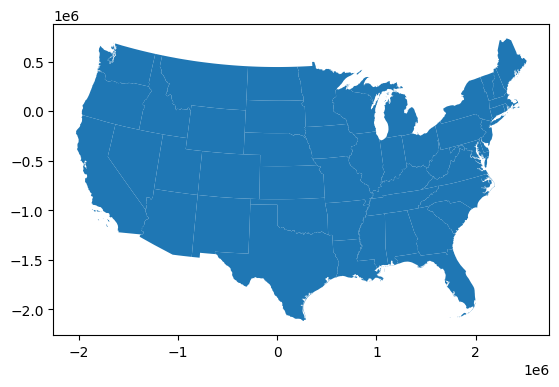

In [4]:
# Reproject to EPSG:9311
gdf_9311 = gdf.to_crs("EPSG:9311")

# List of states to remove
states_to_remove = ["Hawaii", "United States Virgin Islands", "Guam", "Commonwealth of the Northern Mariana Islands",
                    "American Samoa", "Puerto Rico", "Alaska"]
# Filter out states to remove
gdf_9311 = gdf_9311[~gdf_9311["NAME"].isin(states_to_remove)]

gdf_9311.plot()

In [5]:
# States based on their colors
yellow_list = ["California", "Iowa", "Michigan", "Massachusetts", "Connecticut"] 
yellow_states = gdf_9311[gdf_9311["NAME"].isin(yellow_list)]

pink_list = ["Kansas", "Indiana", "West Virginia", "Delaware", "New Jersey"] 
pink_states = gdf_9311[gdf_9311["NAME"].isin(pink_list)]

brown_list = ["Texas", "Arkansas", "Tennessee"] 
brown_states = gdf_9311[gdf_9311["NAME"].isin(brown_list)]

tan_list = ["Missouri", "Florida", "Pennsylvania"] 
tan_states = gdf_9311[gdf_9311["NAME"].isin(tan_list)]

red_list = ["Illinois", "Ohio", "New York"] 
red_states = gdf_9311[gdf_9311["NAME"].isin(red_list)]

black_list = ["Georgia"] 
black_states = gdf_9311[gdf_9311["NAME"].isin(black_list)]

darkblue_list = ["Kentucky", "Maryland"] 
darkblue_states = gdf_9311[gdf_9311["NAME"].isin(darkblue_list)]

stripe_list = ["Louisiana", "North Carolina"] 
stripe_states = gdf_9311[gdf_9311["NAME"].isin(stripe_list)]

square_list = ["Mississippi", "Alabama", "South Carolina", "Virginia"] 
square_states = gdf_9311[gdf_9311["NAME"].isin(square_list)]

In [6]:
# Color dictionary
color_dict = {
    "750,000 NEGROS AND OVER": {
        "color": "#181228",
        "hatch": None,        
    },
    "600,000-750,000": {
        "color": "#dbc9b7",
        "hatch": r"XXXX",        
    },
    "500,000-600,000": {
        "color": "#dbc9b7",
        "hatch": r"\\\\\\",        
    },
    "300,000-500,000": {
        "color": "#63432a",
        "hatch": None,        
    },
    "200,000-300,000": {
        "color": "#1f1a40",
        "hatch": None,        
    },
    "100,000-200,000": {
        "color": "#c2a991",
        "hatch": None,        
    },
    "50,000-100,000": {
        "color": "#c01c3d",
        "hatch": None,        
    },
    "25,000-50,000": {
        "color": "",
        "hatch": None,        
    },
    "25,000-50,000": {
        "color": "#d8ada2",
        "hatch": None,        
    },
     "10,000-25,000": {
        "color": "#e1a600",
        "hatch": None,        
    },
    "UNDER - 10,000": {
        "color": "#cfc1ac",
        "hatch": None,        
    },
}

In [7]:
# List of state gdfs
gdfs = [black_states, square_states, stripe_states, brown_states, darkblue_states,
        tan_states, red_states, pink_states, yellow_states]

# Title
title="RELATIVE NEGRO POPULATION OF THE STATES OF THE\nUNITED STATES."

# Custom font
font = load_google_font("Public Sans", weight="bold")

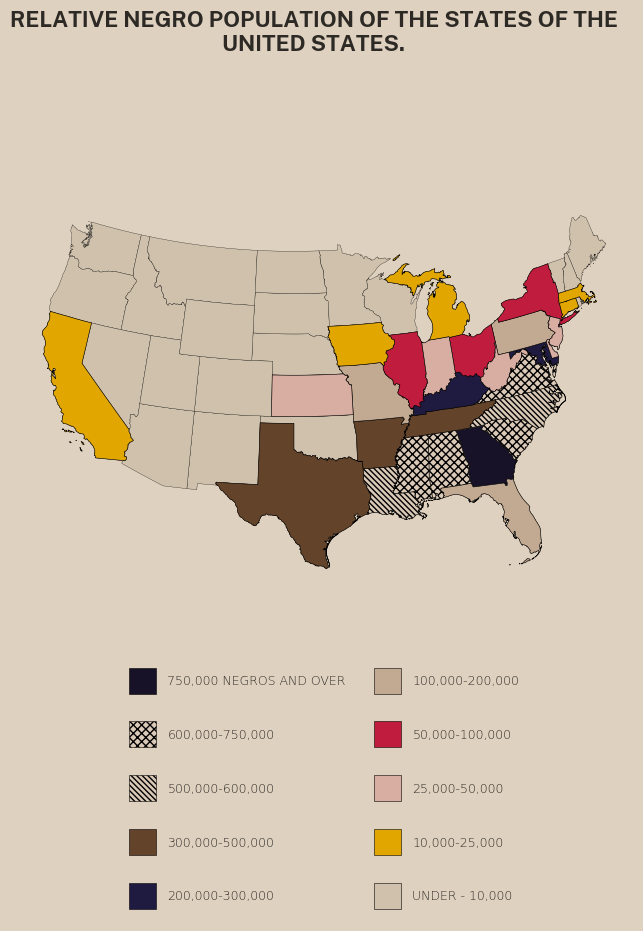

In [8]:
# Create figure
fig, ax = plt.subplots(figsize=(8, 10))
# Adjust spacing 
plt.subplots_adjust(top=0.8, bottom=0)

# PLot USA
gdf_9311.plot(ax=ax, facecolor="#cfc1ac", ec="black", lw=0.2)

# Loop through each item in color_dict and each states to be colored gdf
for (name, value), gdf in zip(color_dict.items(), gdfs):
    gdf.plot(
        ax=ax,
        facecolor=value["color"],
        hatch=value["hatch"],
        edgecolor="black",
        lw=0.4
    )

# Set y axis limit
ax.set_ylim(-4959481.15, 874797.87)

# List to store legend items
legend_items = []

# Loop through each key, value pair in color_dict
for key, value in color_dict.items():
    patch = mpatches.Patch(
        facecolor=value["color"],
        hatch=value["hatch"],
        label=key,
        ec="black",
        lw=0.4
    )
    legend_items.append(patch)

# Legend element aesthetics
legend = ax.legend(
    handles=legend_items,
    loc="lower center",
    frameon=False,
    labelspacing=2,
    ncols=2,
    handlelength=2,   
    handleheight=2.5,      
)

# Control text in legend
for text in legend.get_texts():
    text.set_alpha(0.8)
    text.set_color("black")    
    text.set_fontweight("light")
    text.set_fontsize(9)

# Remove the axis
ax.set_axis_off()

# Background color
fig.set_facecolor("#dfd1bf")

# Add title
fig.suptitle(title, y=0.95, alpha=0.8, size=16, font=font, ha="center")

plt.show()

# Saving the figure
#plt.savefig("plate02.jpg")

In [9]:
import numpy as np
import matplotlib.image as mpimg
from PIL import Image

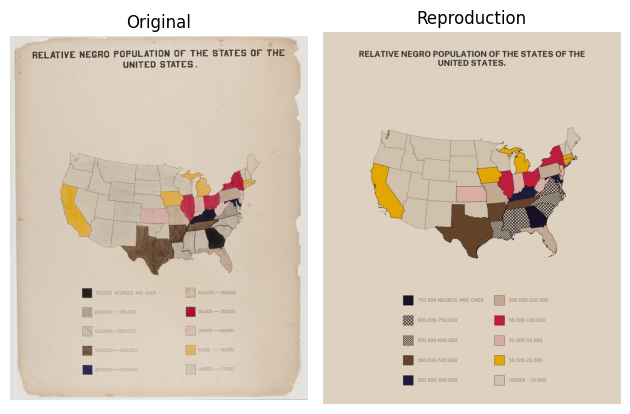

In [10]:
# Load images 
image1 = Image.open("original-plate-02.jpg")
image2 = Image.open("plate02.jpg")

# Convert to numpy arrays
images = [np.array(image1), np.array(image2)]
titles = ["Original", "Reproduction"]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2)

# Loop through axes, images, and titles
for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(title)

# Adjust the layout and show
plt.tight_layout()
plt.show()

# Save the combined figure 
#plt.savefig("plate02sidebyside.png", dpi=300)